In [1]:
# Library importation
# Sys library
import datetime
import time
import os
import warnings
warnings.filterwarnings("ignore")
import random

# standart libs
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score)

from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics.cluster import adjusted_rand_score

# visualisation libs
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import collections

# torch libs
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torch.autograd import Variable as V
import torch.nn.functional as F


from bokeh.plotting import figure, output_notebook, show, ColumnDataSource
from bokeh.models import HoverTool, NumeralTickFormatter
from bokeh.palettes import Set3_12
from bokeh.transform import jitter

import ruptures as rpt

In [2]:
#Входные данные отчищенные по времени
path_cl = [
        'C:\\Users\\markr\\AIC_cleaned\\well1_cl.csv', #1  -1
        #'C:\\Users\\markr\\AIC_cleaned\\well2_cl.csv', #2 #удалить нет параметра PVT3
        #'C:\\Users\\markr\\AIC_cleaned\\well3_cl.csv', #3 #удалить нет параметра PVT3
        #'C:\\Users\\markr\\AIC_cleaned\\well4_cl.csv', #4 #удалить нет параметра PVT1 и STKC
        #'C:\\Users\\markr\\AIC_cleaned\\well5_cl.csv', #5 #удалить нет параметра TVA
        #'C:\\Users\\markr\\AIC_cleaned\\well6_cl.csv', #6 #удалить нет параметра TVA
        'C:\\Users\\markr\\AIC_cleaned\\well7_cl.csv', #7  -2
        'C:\\Users\\markr\\AIC_cleaned\\well8_cl.csv', #8  -3
        'C:\\Users\\markr\\AIC_cleaned\\well9_cl.csv', #9  -4
        'C:\\Users\\markr\\AIC_cleaned\\well10_cl.csv',#10 -5
        'C:\\Users\\markr\\AIC_cleaned\\well11_cl.csv',#11 -6
        'C:\\Users\\markr\\AIC_cleaned\\well12_cl.csv',#12 -7
        'C:\\Users\\markr\\AIC_cleaned\\well13_cl.csv',#13 -8
        'C:\\Users\\markr\\AIC_cleaned\\well14_cl.csv',#14 -9
        #'C:\\Users\\markr\\AIC_cleaned\\well15_cl.csv',#15 Убранно в связи с отсутсвием данных (не критично)
        'C:\\Users\\markr\\AIC_cleaned\\well16_cl.csv',#16 -10
        'C:\\Users\\markr\\AIC_cleaned\\well17_cl.csv',#17 -11
        'C:\\Users\\markr\\AIC_cleaned\\well18_cl.csv',#18 -12
        'C:\\Users\\markr\\AIC_cleaned\\well19_cl.csv',#19 -13
        #'C:\\Users\\markr\\AIC_cleaned\\well20_cl.csv',#20 #удалить нет параметра STKC
        'C:\\Users\\markr\\AIC_cleaned\\well21_cl.csv',#21 -14
        'C:\\Users\\markr\\AIC_cleaned\\well22_cl.csv',#22 -15
        'C:\\Users\\markr\\AIC_cleaned\\well23_cl.csv',#23 -16
        'C:\\Users\\markr\\AIC_cleaned\\well24_cl.csv',#24 -17
        'C:\\Users\\markr\\AIC_cleaned\\well25_cl.csv',#25 -18
        #'C:\\Users\\markr\\AIC_cleaned\\well26_cl.csv',#26 #удалить нет параметра TVA
        'C:\\Users\\markr\\AIC_cleaned\\well27_cl.csv',#27 -19
        'C:\\Users\\markr\\AIC_cleaned\\well28_cl.csv',#28 -20
        'C:\\Users\\markr\\AIC_cleaned\\well29_cl.csv',#29 -21
        'C:\\Users\\markr\\AIC_cleaned\\well30_cl.csv',#30 -22
        'C:\\Users\\markr\\AIC_cleaned\\well31_cl.csv',#31 -23
        'C:\\Users\\markr\\AIC_cleaned\\well32_cl.csv',#32 -24
        'C:\\Users\\markr\\AIC_cleaned\\well33_cl.csv',#33 -25
        'C:\\Users\\markr\\AIC_cleaned\\well34_cl.csv',#34 -26
        'C:\\Users\\markr\\AIC_cleaned\\well35_cl.csv',#35 -27
        #'C:\\Users\\markr\\AIC_cleaned\\well36_cl.csv',#36 #удалить нет параметра PVT1
        'C:\\Users\\markr\\AIC_cleaned\\well37_cl.csv',#37 -28
        'C:\\Users\\markr\\AIC_cleaned\\well38_cl.csv' #38 -29
]
print(len(path_cl))

29


In [3]:
# Фичи датасета
sign_par = ['RIGTIME', ### метка времени (необходимо убрать или не использовать в процессе)
            'BITDEPTH', 'CHKP', 'DEPTH', 'FLWOUT', 'FLWPMPS', 'HKHT', 'HKLI',  #49% max
            'PVT1','PVT3', #100% max № 4,36 ; 2,3
            'PVT5','ROP','SPM1', 'SPM2', 'SPP',  #49% max
            'STKC', #100% max № 4,20
            'TTV1', #49% max
            'TVA', #100% max № 5,6 26
            'WOB', #49% max
            'flag'
           ]
len(sign_par)

20

In [4]:
dflist = []
for file in path_cl:
    df = pd.read_csv(file,parse_dates = ['RIGTIME'])
    dflist.append(df)

In [5]:
data = pd.concat(dflist, axis=0, ignore_index=True)

data = data[sign_par]
data.head()
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7960876 entries, 0 to 7960875
Data columns (total 20 columns):
 #   Column    Dtype         
---  ------    -----         
 0   RIGTIME   datetime64[ns]
 1   BITDEPTH  float64       
 2   CHKP      float64       
 3   DEPTH     float64       
 4   FLWOUT    float64       
 5   FLWPMPS   float64       
 6   HKHT      float64       
 7   HKLI      float64       
 8   PVT1      float64       
 9   PVT3      float64       
 10  PVT5      float64       
 11  ROP       float64       
 12  SPM1      float64       
 13  SPM2      float64       
 14  SPP       float64       
 15  STKC      float64       
 16  TTV1      float64       
 17  TVA       float64       
 18  WOB       float64       
 19  flag      int64         
dtypes: datetime64[ns](1), float64(18), int64(1)
memory usage: 1.2 GB


## Разделение выборки на нормальные и аномальные. Подготовка тренировачной выборки.

In [6]:
normal_X  = data[data.flag ==  0]
normal_X = normal_X.drop('flag',axis=1)
normal_X = normal_X.drop('RIGTIME',axis=1)

# Все данные для теста
X = data
X = X.drop('flag',axis=1)
X = X.drop('RIGTIME',axis=1)

y = data['flag'].copy()

In [7]:
print(normal_X.info(verbose=True))


print(X.info(verbose=True))
print(y.info(verbose=True))

del data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5987349 entries, 0 to 7960875
Data columns (total 18 columns):
 #   Column    Dtype  
---  ------    -----  
 0   BITDEPTH  float64
 1   CHKP      float64
 2   DEPTH     float64
 3   FLWOUT    float64
 4   FLWPMPS   float64
 5   HKHT      float64
 6   HKLI      float64
 7   PVT1      float64
 8   PVT3      float64
 9   PVT5      float64
 10  ROP       float64
 11  SPM1      float64
 12  SPM2      float64
 13  SPP       float64
 14  STKC      float64
 15  TTV1      float64
 16  TVA       float64
 17  WOB       float64
dtypes: float64(18)
memory usage: 867.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7960876 entries, 0 to 7960875
Data columns (total 18 columns):
 #   Column    Dtype  
---  ------    -----  
 0   BITDEPTH  float64
 1   CHKP      float64
 2   DEPTH     float64
 3   FLWOUT    float64
 4   FLWPMPS   float64
 5   HKHT      float64
 6   HKLI      float64
 7   PVT1      float64
 8   PVT3      float64
 9   PVT5    

In [8]:
# Разделение на обучающую и тестовую выборки
train_data, test_data = train_test_split(normal_X, test_size=0.2, random_state=42)
print(train_data)
del normal_X

          BITDEPTH  CHKP      DEPTH  FLWOUT  FLWPMPS     HKHT     HKLI  \
6611472   2512.130   0.0  10190.247   0.000    0.000   91.920   42.578   
4819763  16642.074   0.0  16642.074  14.336  290.741   16.543  246.084   
3428166   1253.500   0.0  17944.000   0.000    0.000   89.990   42.370   
6447474   9815.279   0.0   9818.487   0.000    0.000   96.131   42.956   
2643942  16431.780   0.0  16523.960  15.000  259.710   95.300  258.300   
...            ...   ...        ...     ...      ...      ...      ...   
2421424  15369.250   0.0  16593.230  33.000  269.200   -4.010  240.410   
3115155   1274.120   0.0  17104.440   0.000    0.000   16.190   32.500   
6500219   4581.754   0.0  10190.247  31.917    0.000   43.047   43.900   
5534880   9899.155   0.0  17252.762   0.000    0.000  107.067   37.298   
2544161  15739.110   0.0  15739.110  14.000  243.270   25.700  234.130   

            PVT1     PVT3     PVT5    ROP  SPM1  SPM2       SPP     STKC  \
6611472  100.268  127.526   90.757 

In [9]:
# Нормализация данных
scaler = StandardScaler()
train_data_norm = scaler.fit_transform(train_data)

X_norm = scaler.transform(X)

In [10]:
type(train_data_norm)

numpy.ndarray

## Подготовка модели обучение с рабиением данных

In [11]:
train_data_torch = torch.from_numpy(train_data_norm)
print(train_data_torch)

tensor([[-1.4228, -0.0774, -2.8505,  ...,  1.2250, -0.8218, -0.4716],
        [ 0.8179, -0.0774, -0.0416,  ..., -0.0844,  0.0984, -0.4330],
        [-1.6224, -0.0774,  0.5252,  ..., -0.2035, -0.5199, -0.4856],
        ...,
        [-1.0946, -0.0774, -2.8505,  ..., -0.5789, -0.9688, -0.4716],
        [-0.2514, -0.0774,  0.2243,  ...,  0.0990, -0.7990, -0.4716],
        [ 0.6747, -0.0774, -0.4347,  ..., -0.8368,  0.1954, -0.2806]],
       dtype=torch.float64)


In [12]:
batch_size = 60000
learning_rate = 0.001
num_epochs = 80

In [13]:
train_loader = DataLoader(train_data_torch, batch_size=batch_size)

### Подготовка модели

In [14]:
input_dim = 18 
#train_data.shape[1]
hidden_dim = 10
latent_dim = 1
print(input_dim)

# задаем seed для генератора случайных чисел
#seed_value = 42
#random.seed(seed_value)
#np.random.seed(seed_value)
#torch.manual_seed(seed_value)
#if torch.cuda.is_available():
#    torch.cuda.manual_seed(seed_value)
#    torch.cuda.manual_seed_all(seed_value)

18


In [15]:
# Определение модели
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, latent_dim),
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, input_dim),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [16]:
model = Autoencoder()

In [ ]:
# Training
# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Train the encoder
for epoch in range(num_epochs):
    for i, data in enumerate(train_loader):
        inputs = data.float()
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/80], Loss: 0.7923
Epoch [2/80], Loss: 0.6796
Epoch [3/80], Loss: 0.6578
Epoch [4/80], Loss: 0.6485
Epoch [5/80], Loss: 0.6418
Epoch [6/80], Loss: 0.6360
Epoch [7/80], Loss: 0.6305
Epoch [8/80], Loss: 0.6251
Epoch [9/80], Loss: 0.6198
Epoch [10/80], Loss: 0.6149
Epoch [11/80], Loss: 0.6104
Epoch [12/80], Loss: 0.6066
Epoch [13/80], Loss: 0.6037
Epoch [14/80], Loss: 0.6015
Epoch [15/80], Loss: 0.5998
Epoch [16/80], Loss: 0.5976
Epoch [17/80], Loss: 0.5955
Epoch [18/80], Loss: 0.5932
Epoch [19/80], Loss: 0.5902
Epoch [20/80], Loss: 0.5867
Epoch [21/80], Loss: 0.5835
Epoch [22/80], Loss: 0.5803
Epoch [23/80], Loss: 0.5772
Epoch [24/80], Loss: 0.5741
Epoch [25/80], Loss: 0.5711
Epoch [26/80], Loss: 0.5682
Epoch [27/80], Loss: 0.5655
Epoch [28/80], Loss: 0.5628
Epoch [29/80], Loss: 0.5602
Epoch [30/80], Loss: 0.5576
Epoch [31/80], Loss: 0.5552
Epoch [32/80], Loss: 0.5527
Epoch [33/80], Loss: 0.5505
Epoch [34/80], Loss: 0.5483
Epoch [35/80], Loss: 0.5462
Epoch [36/80], Loss: 0.5442
E

In [ ]:
# Get the state dict of the encoder
encoder_state_dict = model.state_dict()

# Print the values of the encoder's weights
for key, value in encoder_state_dict.items():
    print(key, value)

In [ ]:
#torch.save(model.state_dict(), 'encoder_weights_11.pth')

In [17]:
# задаем seed для генератора случайных чисел
seed_value = 42
random.seed(seed_value)
np.random.seed(seed_value)
torch.manual_seed(seed_value)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value)

In [18]:
model4 = Autoencoder()

In [19]:
# Training
# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.Adam(model4.parameters(), lr=learning_rate)

# Train the encoder
for epoch in range(num_epochs):
    for i, data in enumerate(train_loader):
        inputs = data.float()
        outputs = model4(inputs)
        loss = criterion(outputs, inputs)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [1/80], Loss: 0.8689
Epoch [2/80], Loss: 0.8113
Epoch [3/80], Loss: 0.7709
Epoch [4/80], Loss: 0.7097
Epoch [5/80], Loss: 0.6661
Epoch [6/80], Loss: 0.6421
Epoch [7/80], Loss: 0.6253
Epoch [8/80], Loss: 0.6128
Epoch [9/80], Loss: 0.6038
Epoch [10/80], Loss: 0.5972
Epoch [11/80], Loss: 0.5919
Epoch [12/80], Loss: 0.5855
Epoch [13/80], Loss: 0.5783
Epoch [14/80], Loss: 0.5725
Epoch [15/80], Loss: 0.5674
Epoch [16/80], Loss: 0.5628
Epoch [17/80], Loss: 0.5585
Epoch [18/80], Loss: 0.5549
Epoch [19/80], Loss: 0.5515
Epoch [20/80], Loss: 0.5483
Epoch [21/80], Loss: 0.5451
Epoch [22/80], Loss: 0.5421
Epoch [23/80], Loss: 0.5392
Epoch [24/80], Loss: 0.5365
Epoch [25/80], Loss: 0.5340
Epoch [26/80], Loss: 0.5318
Epoch [27/80], Loss: 0.5297
Epoch [28/80], Loss: 0.5278
Epoch [29/80], Loss: 0.5258
Epoch [30/80], Loss: 0.5240
Epoch [31/80], Loss: 0.5220
Epoch [32/80], Loss: 0.5202
Epoch [33/80], Loss: 0.5182
Epoch [34/80], Loss: 0.5163
Epoch [35/80], Loss: 0.5143
Epoch [36/80], Loss: 0.5126
E

In [20]:
# Get the state dict of the encoder
encoder_state_dict = model4.state_dict()

# Print the values of the encoder's weights
for key, value in encoder_state_dict.items():
    print(key, value)

encoder.0.weight tensor([[ 1.9074e-02, -1.0013e-01, -1.6738e-01,  8.3111e-02, -1.1575e-01,
          6.5220e-03, -1.8302e+00,  5.0953e-03,  3.9446e-01,  3.7136e-01,
          5.9486e-03,  1.1589e+00,  5.6277e-02, -7.2338e-02,  2.8842e-01,
          1.1124e-01, -1.4493e-01,  3.7686e-01],
        [-2.9072e-01, -1.6616e-01, -5.3119e-01, -1.3736e-01, -2.3591e+00,
          1.0441e-01, -4.8425e-01, -3.5838e-01,  5.9452e-01,  4.5109e-01,
         -7.4099e-02, -3.5691e-01,  1.5116e-01, -1.1821e+00,  1.1081e+00,
          1.5583e-02, -4.8382e-01,  8.0550e-01],
        [-3.0925e-01,  2.2175e-01, -1.0783e-01, -1.4068e-01, -1.1891e-01,
          4.3561e-02, -3.3856e-03, -1.2297e-01, -1.8075e-01,  7.5868e-02,
          2.9587e-02,  2.4004e-01, -1.9910e-01,  7.0443e-01, -2.8594e-01,
         -3.9631e-01,  4.3559e-02,  1.9061e-01],
        [ 2.4586e-02,  6.2612e-02,  7.1903e-02, -4.3982e-02,  3.6177e-01,
         -2.5637e-02, -1.4166e-01, -3.3463e-01, -4.1830e-01, -7.7042e-03,
         -1.6484e-02, 

#### Был проведен ряд запусков модели ( в том числе и с фикисрованным random_seed) что приводило к несколько различающимся весам энкодера. Далее будет проведен ряд тестов на то, подходят ли эти веса или нет.  Получено 9 различных наборов весов, однако небходио просто визуально удостовериться являются ли эти веса подходящими для детекции аномалий. 

In [16]:
weights_files = ['encoder_weights.pth',                          # Веса модели при разных запусках обучения.
                 'encoder_weights_2.pth',
                 'encoder_weights_3.pth',
                 'encoder_weights_11.pth',
                 'encoder_weights_12.pth',
                 'encoder_weights_13.pth',
                 'encoder_weights_14.pth',
                 'encoder_weights_15.pth',
                 'encoder_weights_16.pth'
                ]
print(len(weights_files))

9


In [21]:
def visual_test(num,weights_f):
    # Создание модели с необходимыми весами
    model = Autoencoder()
    model.load_state_dict(torch.load(weights_f[num-1]))
    
    data = torch.from_numpy(X_norm)
    encoded_data = model(data.to(torch.float32))
    
    # преобразуем тензор в массив numpy
    arr = encoded_data.detach().numpy()
    # создаем объект Pandas DataFrame из массива numpy
    df = pd.DataFrame(arr)
    
    print("Визуальное сравнение граифика кодированных данных и графика меток аномалий для весов из файла №",num)
    # График кодированных данных
    plt.figure(figsize=(6, 4))
    plt.plot(range(0,7960876,1),df[0])
    plt.show()
    # График расположения меток
    plt.figure(figsize=(6, 4))
    plt.plot(range(0,7960876,1),y)
    plt.show()

Визуальное сравнение граифика кодированных данных и графика меток аномалий для весов из файла № 1


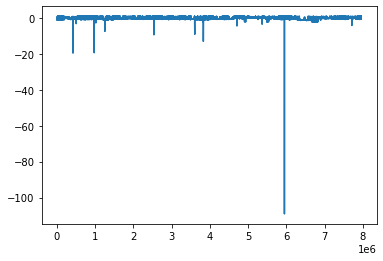

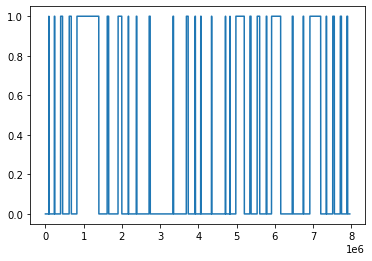

In [22]:
visual_test(1,weights_files)

Визуальное сравнение граифика кодированных данных и графика меток аномалий для весов из файла № 2


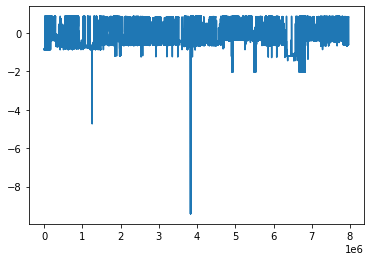

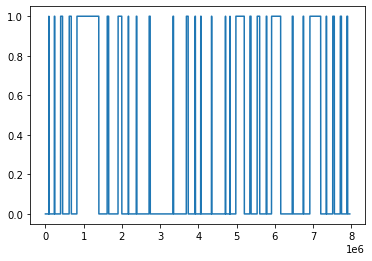

In [23]:
visual_test(2,weights_files)

#### Как видно во много есть некоторые визуальные признаки, что некоторые веса имеют более сильную визуальную сигнатуру, которая больше согласуется с графиками меток. 

## Разработка CPD фильтров для определения участков аномалий. 

In [24]:
import psutil

process = psutil.Process()
mem_percent = process.memory_percent()
print(mem_percent)

18.310190540992018


In [25]:
#Входные данные отчищенные по времени
path_cl = [
        'C:\\Users\\markr\\AIC_cleaned\\well1_cl.csv', #1  -1
        #'C:\\Users\\markr\\AIC_cleaned\\well2_cl.csv', #2 #удалить нет параметра PVT3
        #'C:\\Users\\markr\\AIC_cleaned\\well3_cl.csv', #3 #удалить нет параметра PVT3
        #'C:\\Users\\markr\\AIC_cleaned\\well4_cl.csv', #4 #удалить нет параметра PVT1 и STKC
        #'C:\\Users\\markr\\AIC_cleaned\\well5_cl.csv', #5 #удалить нет параметра TVA
        #'C:\\Users\\markr\\AIC_cleaned\\well6_cl.csv', #6 #удалить нет параметра TVA
        'C:\\Users\\markr\\AIC_cleaned\\well7_cl.csv', #7  -2
        'C:\\Users\\markr\\AIC_cleaned\\well8_cl.csv', #8  -3
        'C:\\Users\\markr\\AIC_cleaned\\well9_cl.csv', #9  -4
        'C:\\Users\\markr\\AIC_cleaned\\well10_cl.csv',#10 -5
        'C:\\Users\\markr\\AIC_cleaned\\well11_cl.csv',#11 -6
        'C:\\Users\\markr\\AIC_cleaned\\well12_cl.csv',#12 -7
        'C:\\Users\\markr\\AIC_cleaned\\well13_cl.csv',#13 -8
        'C:\\Users\\markr\\AIC_cleaned\\well14_cl.csv',#14 -9
        #'C:\\Users\\markr\\AIC_cleaned\\well15_cl.csv',#15 Убранно в связи с отсутсвием данных (не критично)
        'C:\\Users\\markr\\AIC_cleaned\\well16_cl.csv',#16 -10
        'C:\\Users\\markr\\AIC_cleaned\\well17_cl.csv',#17 -11
        'C:\\Users\\markr\\AIC_cleaned\\well18_cl.csv',#18 -12
        'C:\\Users\\markr\\AIC_cleaned\\well19_cl.csv',#19 -13
        #'C:\\Users\\markr\\AIC_cleaned\\well20_cl.csv',#20 #удалить нет параметра STKC
        'C:\\Users\\markr\\AIC_cleaned\\well21_cl.csv',#21 -14
        'C:\\Users\\markr\\AIC_cleaned\\well22_cl.csv',#22 -15
        'C:\\Users\\markr\\AIC_cleaned\\well23_cl.csv',#23 -16
        'C:\\Users\\markr\\AIC_cleaned\\well24_cl.csv',#24 -17
        'C:\\Users\\markr\\AIC_cleaned\\well25_cl.csv',#25 -18
        #'C:\\Users\\markr\\AIC_cleaned\\well26_cl.csv',#26 #удалить нет параметра TVA
        'C:\\Users\\markr\\AIC_cleaned\\well27_cl.csv',#27 -19
        'C:\\Users\\markr\\AIC_cleaned\\well28_cl.csv',#28 -20
        'C:\\Users\\markr\\AIC_cleaned\\well29_cl.csv',#29 -21
        'C:\\Users\\markr\\AIC_cleaned\\well30_cl.csv',#30 -22
        'C:\\Users\\markr\\AIC_cleaned\\well31_cl.csv',#31 -23
        'C:\\Users\\markr\\AIC_cleaned\\well32_cl.csv',#32 -24
        'C:\\Users\\markr\\AIC_cleaned\\well33_cl.csv',#33 -25
        'C:\\Users\\markr\\AIC_cleaned\\well34_cl.csv',#34 -26
        'C:\\Users\\markr\\AIC_cleaned\\well35_cl.csv',#35 -27
        #'C:\\Users\\markr\\AIC_cleaned\\well36_cl.csv',#36 #удалить нет параметра PVT1
        'C:\\Users\\markr\\AIC_cleaned\\well37_cl.csv',#37 -28
        'C:\\Users\\markr\\AIC_cleaned\\well38_cl.csv' #38 -29
]
print(len(path_cl))

29


### Разработка функции фильтрации по CPD для кодированного сигнала с поиском аномальных островов. Функция расчитывает метрики для конкретной скважины.

In [26]:
from sklearn.metrics import precision_recall_curve, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics.cluster import adjusted_rand_score

In [29]:
def visual_test_detal(N,path,num,weights_f):
    # Создание модели с необходимыми весами
    model = Autoencoder()
    model.load_state_dict(torch.load(weights_f[num-1]))
    
    par = [
            'BITDEPTH', 'CHKP', 'DEPTH', 'FLWOUT', 'FLWPMPS', 'HKHT', 'HKLI',  #49% max
            'PVT1','PVT3', #100% max № 4,36 ; 2,3
            'PVT5','ROP','SPM1', 'SPM2', 'SPP',  #49% max
            'STKC', #100% max № 4,20
            'TTV1', #49% max
            'TVA', #100% max № 5,6 26
            'WOB'
           ]
    
    data = pd.read_csv(path[N-1],parse_dates = ['RIGTIME'])
    y = data['flag'].copy()
    X = data[par]
       
    X_norm = scaler.transform(X)  
    dd = torch.from_numpy(X_norm)
    encoded_data = model(dd.to(torch.float32))
    
    # преобразуем тензор в массив numpy
    arr = encoded_data.detach().numpy()
    # создаем объект Pandas DataFrame из массива numpy
    
    #print("Визуальное сравнение граифика кодированных данных и графика меток аномалий для весов из файла №",num)
    # График кодированных данных
    #plt.figure(figsize=(6, 4))
    #plt.plot(range(0,len(y),1),pd.DataFrame(arr)[0])
    #plt.show()
    # График расположения меток
    #plt.figure(figsize=(6, 4))
    #plt.plot(range(0,len(y),1),y)
    #plt.show()
    
    #y.to_numpy()
    y = y.to_numpy()
    print(len(y))
    bkps = []
    # Создание списка changepointов для массива
    for i in range(0,len(y)-1,1):
        if y[i] == 0 and y[i+1] == 1:
            bkps.append(i+1)
        if y[i] == 1 and y[i+1] == 0:
            bkps.append(i)
    
    # change point detection
    model_CPD = "l1"  # "l2", "rbf"
    algo = rpt.Pelt(model=model_CPD,
                    min_size=50,   ### минимальное расстояние между сменами (примерно 5 мин)
                    jump=250       ### пяттнадцатиминутный перерыв
                   ).fit(arr)
    
    #print("Номера оригинальных Change points")
    #print(bkps)
    
    my_bkps = algo.predict(pen = 3)
    
    
    #print("Номера предсказанных Change points")
    #print(my_bkps)
    

    
    y_pred = np.zeros(len(y))
    for i in range(0,len(my_bkps)-2,2):
        y_pred[my_bkps[i]] = 1
        for j in range(my_bkps[i],my_bkps[i+1]):
            y_pred[j] = 1
        y_pred[my_bkps[i+1]] = 1
    
            
    
    print("Расчет метрик детекции для скважины №", N)
    print(confusion_matrix(y, y_pred))
    target_names = ['normal', 'anomaly']
    print(classification_report(y, y_pred, target_names=target_names))
    print('ARS',adjusted_rand_score(y, y_pred))
    
    

In [30]:
visual_test_detal(1,path_cl,7,weights_files)

169960
Расчет метрик детекции для скважины № 1
[[88285 80445]
 [  749   481]]
              precision    recall  f1-score   support

      normal       0.99      0.52      0.69    168730
     anomaly       0.01      0.39      0.01      1230

    accuracy                           0.52    169960
   macro avg       0.50      0.46      0.35    169960
weighted avg       0.98      0.52      0.68    169960

ARS -0.00022621507740969493


In [31]:
visual_test_detal(14,path_cl,7,weights_files)

86602
Расчет метрик детекции для скважины № 14
[[39845 35705]
 [ 5147  5905]]
              precision    recall  f1-score   support

      normal       0.89      0.53      0.66     75550
     anomaly       0.14      0.53      0.22     11052

    accuracy                           0.53     86602
   macro avg       0.51      0.53      0.44     86602
weighted avg       0.79      0.53      0.61     86602

ARS 0.0023497082170998653
